In [9]:
# TODO scrape any car data from ss.com
# clean up prices as numerics
# group by make and model
# plot the data - pricing for sure

In [10]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
url = "https://www.ss.com/en/transport/cars/bmw/sell/"

In [12]:
req = requests.get(url)
req.status_code

200

In [13]:
soup = BeautifulSoup(req.text, 'lxml')
soup.title

<title>SS.COM Cars - BMW, Prices, Sell - Advertisements</title>

In [14]:
tables = soup.find_all("table")
headline = soup.find("tr", {"id":"head_line"})
headtds = headline.find_all("td")
headline.text
headtds[0].text

'\n\xa0Advertisements\r\n\n\n\ndate\n'

In [15]:
headcolumns = [el.text for el in headtds[1:]]
headcolumns

['Model', 'Year', 'Volume', 'Run', 'Price']

In [16]:
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns
    return column_list

In [17]:
column_names = getColList(soup)
column_names

['description', 'url', 'Model', 'Year', 'Volume', 'Run', 'Price']

In [18]:
trows = soup.find_all('tr')

In [19]:
rows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]

In [20]:
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [21]:
rows = getRowList(soup)

In [22]:
first_ad = rows[0]

In [23]:
row_tds = first_ad.find_all('td')

In [24]:
def getRow(row,colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [25]:
getRow(rows[6])

{'description': 'Pārdodu savu BMW 730D 2012 gada. Komforta salons, logic7, soft close sistēma',
 'url': 'https://ss.com/msg/en/transport/cars/bmw/730/emhde.html',
 'Model': '730',
 'Year': '2012',
 'Volume': '3.0D',
 'Run': '268 thd.',
 'Price': '15,900  €'}

In [26]:
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist]

In [27]:
def getDFfromURL(url):
    
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None 
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)

In [28]:
cars_bmw = url
idf = getDFfromURL(cars_bmw)
idf.head()

,description,url,Model,Year,Volume,Run,Price
0,Pārdodu BMW E91 318d 105kw (143zs) \r\nTikko a...,https://ss.com/msg/en/transport/cars/bmw/318/a...,318,2010,2.0D,-,"5,199 €"
1,"7 vietas. Labs auto gan vizuāli, gan tehniski.",https://ss.com/msg/en/transport/cars/bmw/x5/ad...,X5,2008,3.0D,270 thd.,"10,500 €"
2,Bmw 320d Facelift 110kw\r\nTikko Ievests vācu ...,https://ss.com/msg/en/transport/cars/bmw/320/d...,320,2004,2.0D,254 thd.,"3,390 €"
3,"Pārdodu BMW 525d 2005.gada Orģināls, 360k nobr...",https://ss.com/msg/en/transport/cars/bmw/525/b...,525,2005,2.5D,360 thd.,"4,400 €"
4,Pardod vai maina. \r\nTikko izieta TA\r\nBMW E...,https://ss.com/msg/en/transport/cars/bmw/530/b...,530,2002,3.0D,426 thd.,"2,500 €"


In [32]:
idf.to_csv("cars_bmw_20221023.csv", index=False)

In [33]:
bmw_df = pd.read_csv(r"cars_bmw_20221023.csv")
bmw_df.head()


,description,url,Model,Year,Volume,Run,Price
0,Pārdodu BMW E91 318d 105kw (143zs) \r\nTikko a...,https://ss.com/msg/en/transport/cars/bmw/318/a...,318,2010,2.0D,-,"5,199 €"
1,"7 vietas. Labs auto gan vizuāli, gan tehniski.",https://ss.com/msg/en/transport/cars/bmw/x5/ad...,X5,2008,3.0D,270 thd.,"10,500 €"
2,Bmw 320d Facelift 110kw\r\nTikko Ievests vācu ...,https://ss.com/msg/en/transport/cars/bmw/320/d...,320,2004,2.0D,254 thd.,"3,390 €"
3,"Pārdodu BMW 525d 2005.gada Orģināls, 360k nobr...",https://ss.com/msg/en/transport/cars/bmw/525/b...,525,2005,2.5D,360 thd.,"4,400 €"
4,Pardod vai maina. \r\nTikko izieta TA\r\nBMW E...,https://ss.com/msg/en/transport/cars/bmw/530/b...,530,2002,3.0D,426 thd.,"2,500 €"


In [34]:
bmw_df['Price'] = bmw_df['Price'].str.replace("€","")
bmw_df['Price'] = bmw_df['Price'].str.replace(",","")
# bmw_df.Price.head()
bmw_df['Price'] = pd.to_numeric(bmw_df['Price'], errors='coerce')

pd.options.display.float_format = '{:,.2f}'.format
bmw_df['Price'].describe()

count       60.00
mean     7,308.92
std      6,639.78
min      1,450.00
25%      3,467.50
50%      5,675.00
75%      7,825.00
max     43,499.00
Name: Price, dtype: float64

In [36]:
bmw_df.shape

(60, 7)

In [35]:
bmw_df.groupby(['Model']).describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
120,2.00,"5,220.00",608.11,"4,790.00","5,005.00","5,220.00","5,435.00","5,650.00"
316,1.00,"1,480.00",NaN,"1,480.00","1,480.00","1,480.00","1,480.00","1,480.00"
318,7.00,"6,214.14","4,809.64","1,450.00","3,575.00","5,199.00","6,900.00","15,900.00"
320,16.00,"6,894.94","4,538.05","2,000.00","3,397.50","6,565.00","7,925.00","18,900.00"
325,2.00,"6,350.00",919.24,"5,700.00","6,025.00","6,350.00","6,675.00","7,000.00"
330,4.00,"3,597.50","2,259.50","1,500.00","2,475.00","3,050.00","4,172.50","6,790.00"
430,1.00,"43,499.00",NaN,"43,499.00","43,499.00","43,499.00","43,499.00","43,499.00"
520,2.00,"10,525.00","3,075.91","8,350.00","9,437.50","10,525.00","11,612.50","12,700.00"
525,4.00,"4,422.25","1,466.10","3,299.00","3,442.25","3,945.00","4,925.00","6,500.00"


In [37]:
bmw_df.groupby(['Year']).describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1998,1.00,"2,300.00",NaN,"2,300.00","2,300.00","2,300.00","2,300.00","2,300.00"
2000,2.00,"1,975.00",742.46,"1,450.00","1,712.50","1,975.00","2,237.50","2,500.00"
2001,1.00,"2,350.00",NaN,"2,350.00","2,350.00","2,350.00","2,350.00","2,350.00"
2002,4.00,"2,782.50","1,030.16","1,480.00","2,245.00","2,900.00","3,437.50","3,850.00"
2003,5.00,"3,108.00",513.39,"2,350.00","2,800.00","3,400.00","3,490.00","3,500.00"
2004,7.00,"3,255.57","1,222.99","1,500.00","2,649.50","3,300.00","3,795.00","5,100.00"
2005,6.00,"5,531.33","1,187.87","3,799.00","4,712.50","5,924.50","6,267.25","6,850.00"
2006,2.00,"4,595.00","1,562.71","3,490.00","4,042.50","4,595.00","5,147.50","5,700.00"
2007,5.00,"7,276.00",386.43,"6,790.00","7,000.00","7,290.00","7,600.00","7,700.00"


In [38]:
bmw_df['Run'] = bmw_df['Run'].str.replace("thd.","")
bmw_df['Run'] = pd.to_numeric(bmw_df['Run'], errors='coerce')
bmw_df.groupby(['Year']).describe()['Run']

C:\Users\val-wd\AppData\Local\Temp\ipykernel_11324\1456715884.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bmw_df['Run'] = bmw_df['Run'].str.replace("thd.","")


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1998,1.00,126.00,NaN,126.00,126.00,126.00,126.00,126.00
2000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,1.00,166.00,NaN,166.00,166.00,166.00,166.00,166.00
2002,4.00,351.75,63.99,293.00,301.25,344.00,394.50,426.00
2003,4.00,324.25,52.03,255.00,306.00,331.00,349.25,380.00
2004,7.00,354.86,80.31,250.00,299.50,349.00,417.50,451.00
2005,4.00,329.75,33.37,286.00,313.00,336.50,353.25,360.00
2006,2.00,338.00,264.46,151.00,244.50,338.00,431.50,525.00
2007,3.00,230.00,61.80,183.00,195.00,207.00,253.50,300.00


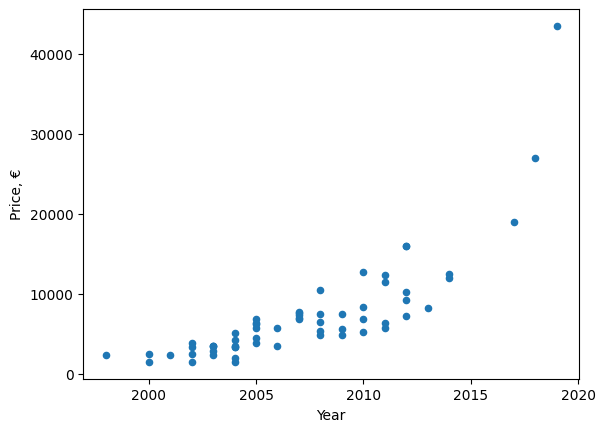

In [39]:

bmw_df_price = bmw_df.sort_values(['Year'], ascending=[True])
bmw_df_price = pd.DataFrame(bmw_df_price,columns=['Year','Price'])
bmw_df_price.plot(x ='Year', y='Price', kind = 'scatter')
plt.ylabel('Price, \u20ac')
plt.show()


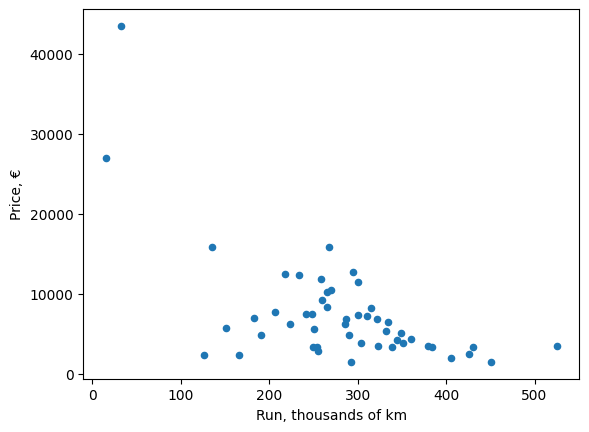

In [40]:
bmw_df_run = bmw_df.sort_values(['Run'], ascending=[True])
bmw_df_run = pd.DataFrame(bmw_df_run,columns=['Run','Price'])
bmw_df_run.plot(x ='Run', y='Price', kind = 'scatter')
plt.xlabel('Run, thousands of km')
plt.ylabel('Price, \u20ac')
plt.show()

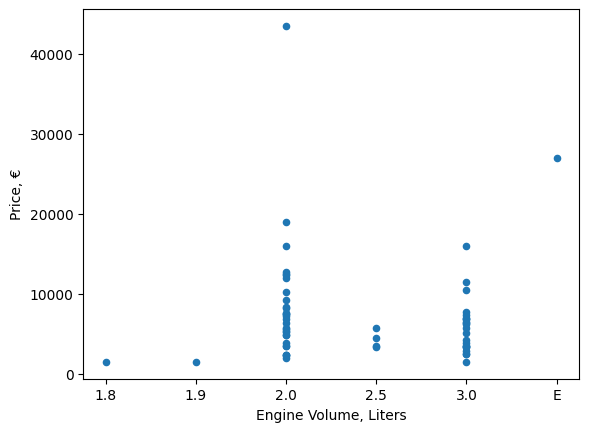

In [41]:
bmw_df['Volume'] = bmw_df['Volume'].str.replace("D","")
bmw_df['Volume'] = bmw_df['Volume'].str.replace("B","")
bmw_df['Volume'] = bmw_df['Volume'].str.replace("H","")
bmw_df_volume = bmw_df.sort_values(['Volume'], ascending=[True])
bmw_df_volume = pd.DataFrame(bmw_df_volume,columns=['Volume','Price'])
bmw_df_volume.plot(x ='Volume', y='Price', kind = 'scatter')
plt.ylabel('Price, \u20ac')
plt.xlabel('Engine Volume, Liters')
plt.show()

Text(0.5, 1.0, 'The median car price, €')

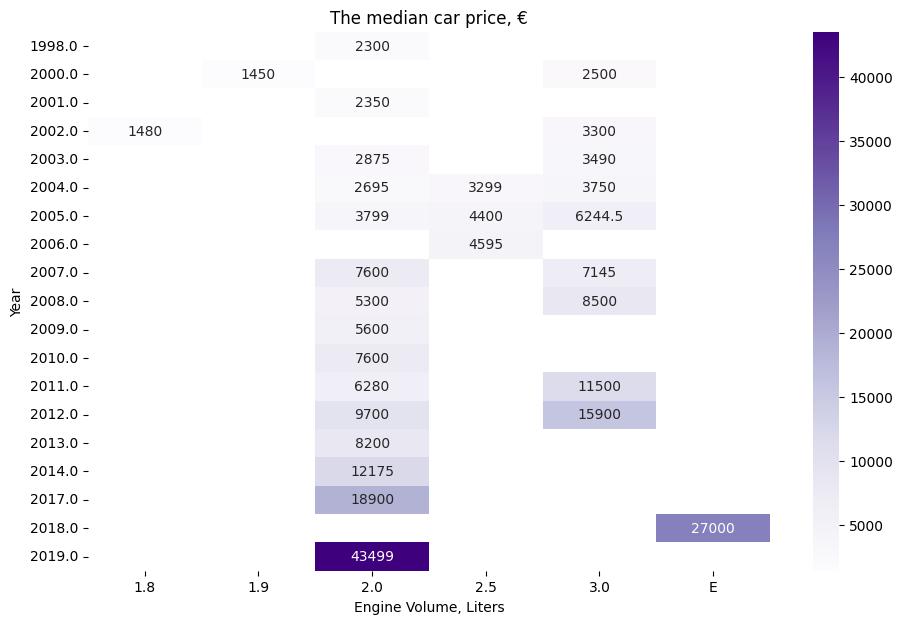

In [42]:
bmw_map = bmw_df[['Year', 'Volume', 'Run', 'Price', 'Model']]
bmw_map = bmw_map.astype({'Year':'float'})

bmw_table = bmw_map.pivot_table(index='Year', columns='Volume', values='Price', aggfunc=np.median)
bmw_table
plt.figure(figsize=(11,7))
ax = sns.heatmap(data=bmw_table, cmap='Purples', annot=True, fmt='g')
ax.set_xlabel('Engine Volume, Liters')
ax.set_title('The median car price, \u20ac')

Text(0.5, 1.0, 'The median car price, €')

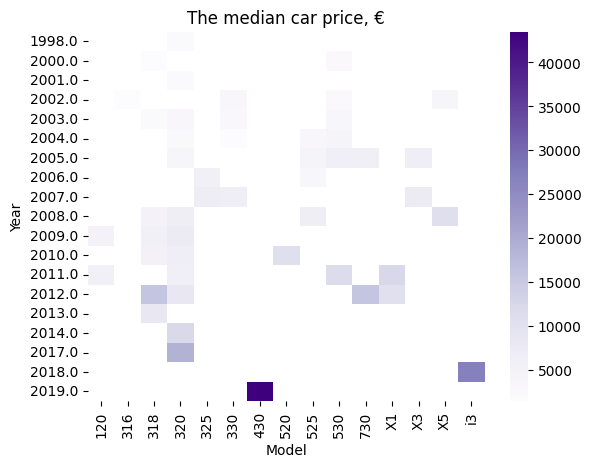

In [43]:

bmw_table = bmw_map.pivot_table(index='Year', columns='Model', values='Price', aggfunc=np.median)
bmw_table
ax = sns.heatmap(data=bmw_table, cmap='Purples')
ax.set_xlabel('Model')
ax.set_title('The median car price, \u20ac')